### 1、python基础试题

### 1.1

In [ ]:
boolean:布尔型数据
float:浮点型数据
int:整数数据

##### 1.2

In [1]:
j=1
sum=0
for i in range(1,100):
    sum+=j*i
    j=j*(-1)
print(sum)

50


##### 1.3

In [2]:
string='yoyo'
print(list(string))

['y', 'o', 'y', 'o']


### 2、python进阶基础试题

##### 2.1

In [ ]:
在1到99之间
从索引号为2即3开始
每3个数取数
得到序列取最后10个数输出

##### 2.2

In [3]:
class stock:
    def __init__(self,stockname,high,close):
        self.stockname = stockname
        self.high = high
        self.close = close
    def cal(self):
        return {self.stockname+'_dif':self.high-self.close}
stockone = stock('one',15,7)
print(stockone.cal())
stocktwo = stock('two',66,20)
print(stocktwo.cal())

{'one_dif': 8}
{'two_dif': 46}


### 3、pandas数据处理

##### 3.1

In [ ]:
查看列名：DadaFrame.columns()
数据转置：transpose()

##### 3.2

In [6]:
import numpy as np
import pandas as pd
stock=pd.read_excel("/Users/zouhao/Desktop/sz50.xlsx",sheetname='600029.XSHG',index_col='datetime')
close=np.array(stock.close)

/anaconda3/lib/python3.7/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [9]:
import talib as ta
data=ta.EMA(close,timeperiod=10)
print(data[-5:])

[15.08227205 15.2564044  15.44433088 15.72172526 15.96322976]


##### 3.3

In [13]:
import pandas as pd
symbol=['600029.XSHG','600050.XSHG','601318.XSHG']
data_dict={}
for s in symbol:
    data=pd.read_excel('/Users/zouhao/Desktop/sz50.xlsx',sheetname=s,index_col='datetime')
    data_dict[s]=data.loc[:]//全部

/anaconda3/lib/python3.7/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [16]:
PN=pd.Panel(data_dict)
print(PN)

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 215 (major_axis) x 5 (minor_axis)
Items axis: 600029.XSHG to 601318.XSHG
Major_axis axis: 2017-01-03 15:00:00 to 2017-11-20 15:00:00
Minor_axis axis: close to volume


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2961: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


##### 3.4

In [19]:
stock_numpy=np.array(PN)
print(stock_numpy.shape)
print(stock_numpy[:,-20:,0])

(3, 215, 5)
[[ 13.85  13.82  13.83  14.11  14.25  14.39  15.1   15.15  15.22  14.97
   14.89  14.99  14.71  15.07  15.35  16.    16.04  16.29  16.97  17.05]
 [  8.53   8.56   8.62   8.88   9.25   9.24   9.43   9.25   9.02   9.15
    9.63   9.5    9.9    9.97   9.96   9.49   9.68   9.61   9.63   9.8 ]
 [134.83 134.56 137.5  143.18 143.48 144.15 143.61 143.65 144.35 143.36
  146.41 144.71 148.56 156.53 157.12 157.72 154.99 163.52 168.58 169.57]]


##### 3.5

In [20]:
import numpy as np
print(np.arange(25).reshape(5,5))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


### 4、数据计算与统计

##### 4.1

In [1]:
import pandas as pd
stock1 = pd.read_excel('/Users/zouhao/Desktop/sz50.xlsx',sheetname='600104.XSHG', index_col='datetime')
stock2 = pd.read_excel('/Users/zouhao/Desktop/sz50.xlsx',sheetname='600518.XSHG', index_col='datetime')
five_day_df = pd.concat([stock1.close.pct_change(5),stock2.close.pct_change(5)],keys=['stock1','stock2'],axis=1)

/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [2]:
correlation = five_day_df.corr()
print(correlation)

          stock1    stock2
stock1  1.000000  0.348809
stock2  0.348809  1.000000


In [3]:
spearman = five_day_df.corr(method='spearman')
print(spearman)

         stock1   stock2
stock1  1.00000  0.38035
stock2  0.38035  1.00000


In [4]:
cov_30 = five_day_df.rolling(30).cov()
print(cov_30.tail(6))

                              stock1    stock2
datetime                                      
2017-11-16 15:00:00 stock1  0.001200  0.000289
                    stock2  0.000289  0.000682
2017-11-17 15:00:00 stock1  0.001196  0.000291
                    stock2  0.000291  0.000710
2017-11-20 15:00:00 stock1  0.001192  0.000318
                    stock2  0.000318  0.000696


##### 4.2

In [14]:
stocks=pd.read_excel("/Users/zouhao/Desktop/sz50.xlsx",sheetname=['600104.XSHG','601901.XSHG','601318.XSHG'],index_col="datetime")
stocks=pd.Panel(stocks)
stocks=stocks.transpose(2,1,0)

/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)
/anaconda3/envs/python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3265: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/core/panel.py:1268: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can u

In [23]:
import datetime
from matplotlib.pylab import date2num
stock_1=stocks.minor_xs("600104.XSHG")
stock_1.index=(list(map(lambda x:x-datetime.timedelta(hours=15),stock_1.index)))
stock_1['time'] = list(map(date2num, stock_1.index))
stock_1.fillna(method="ffill",inplace=True)

In [24]:
i=[-1]
def day_close_to_week(x):
    try:
        return x.values[-1]
    except:
        return np.NAN

period="W"
close_price=stock_1.resample(period,closed="right")["close"].apply(day_close_to_week)
open_price=stock_1.resample(period)["open"].first()
high_price=stock_1.resample(period)["high"].max()
low_price=stock_1.resample(period)["low"].min()
stock_1=pd.concat([close_price,open_price,high_price,low_price],keys=["close","open","high","low"],axis=1).dropna()
stock_1['time'] = list(map(date2num, stock_1.index))
# stock_1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """


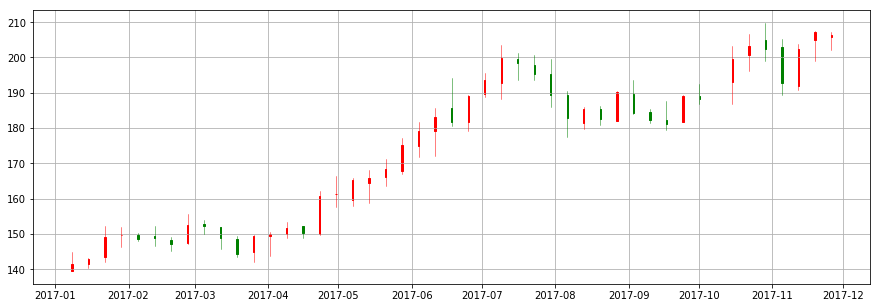

In [27]:
from matplotlib.pylab import date2num
import mpl_finance as mpf
import matplotlib.pyplot as plt

candle = stock_1.reindex_axis(["time", "open", "high", "low", "close"], 1).values

fig, ax = plt.subplots(1,1,sharex=True, figsize=(15,10))
fig.subplots_adjust(bottom=0.5)
ax.grid(True)
mpf.candlestick_ohlc(ax, candle, width=0.6, colorup='r', colordown='g',alpha=1.0)
#ax1.bar(stock1.time,stock1.volume)
ax.xaxis_date ()
plt.show()

##### 4.3

In [8]:
import tushare as ts
import pandas as pd
from statsmodels.stats.stattools import jarque_bera
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = ts.get_k_data('601857', start='2017-01-01', end='2017-12-31', ktype='D',autype='qfq')
data.index = pd.to_datetime(data['date'],format='%Y-%m-%d')
data['percentage']=data['close'].pct_change()
returns = data['percentage'][1:]
_, pvalue, _, _ = jarque_bera(returns)
if pvalue > 0.05:
    print ('判断样本分布服从正态分布')
else:
    print ('判断样本分布不服从正态分布')

判断样本分布不服从正态分布


In [10]:
t_test = stats.ttest_1samp(returns, 0)
if t_test.pvalue > 0.05:
    print ('判断样本均值为0')
else:
    print ('判断样本均值不为0')

判断样本均值为0


##### 4.4

In [18]:
stock_2=pd.read_excel('/Users/zouhao/Desktop/sz50.xlsx', sheetname='601901.XSHG', index_col='datetime')
# def SMA(A,n,m):
#     # 设置alpha的比例
#     alpha = m/n
#     #通过ewm计算递归函数
#     return A.ewm(alpha=alpha, adjust=False).mean()

EMA=stock_2.close.ewm(alpha=2/11,adjust=False).mean()
EMA_EMA=EMA.ewm(alpha=2/11,adjust=False).mean()

In [21]:
DEMA=2*EMA-EMA_EMA
print(EMA.tail())
print(DEMA.tail())

datetime
2017-11-14 15:00:00    8.556962
2017-11-15 15:00:00    8.544787
2017-11-16 15:00:00    8.496644
2017-11-17 15:00:00    8.426345
2017-11-20 15:00:00    8.388828
Name: close, dtype: float64
datetime
2017-11-14 15:00:00    8.602581
2017-11-15 15:00:00    8.572151
2017-11-16 15:00:00    8.479642
2017-11-17 15:00:00    8.354917
2017-11-20 15:00:00    8.299691
Name: close, dtype: float64


In [20]:
import talib as ta
from talib import abstract
import pandas as pd

print(abstract.EMA(stock_2, 10).tail())
print(abstract.DEMA(stock_2, 10).tail())

datetime
2017-11-14 15:00:00    8.556962
2017-11-15 15:00:00    8.544787
2017-11-16 15:00:00    8.496644
2017-11-17 15:00:00    8.426345
2017-11-20 15:00:00    8.388828
dtype: float64
datetime
2017-11-14 15:00:00    8.602581
2017-11-15 15:00:00    8.572151
2017-11-16 15:00:00    8.479642
2017-11-17 15:00:00    8.354917
2017-11-20 15:00:00    8.299691
dtype: float64


### 5、分析工具

##### 5.1

In [2]:
#调用之前取过的数据
from jaqs_fxdayu.data import DataView 
import warnings

warnings.filterwarnings("ignore")
dataview_folder = '/tmp/Factor'
dv = DataView()
dv.load_dataview(dataview_folder)

Dataview loaded successfully.


In [6]:
from jaqs_fxdayu.data import DataView # 可以视为一个轻量级的数据库，数据格式基于pandas，方便数据的调用和处理
from jaqs_fxdayu.data import RemoteDataService # 数据服务，用于下载数据
import os
import pandas as pd
import warnings
from datetime import datetime

factor = dv.get_ts("float_mv")
factor.index = pd.Index(map(lambda x: datetime.strptime(str(x),"%Y%m%d") , factor.index)) #索引调整为datetime日期格式
factor = factor.stack()#处理成MultiIndex格式（alphalens分析因子必须的格式）

def change_index(df):
    df.index = pd.Index(map(lambda x: datetime.strptime(str(x),"%Y%m%d") , df.index)) #索引调整为datetime日期格式 
    return df

def grouping(df):
    for x in df.columns:
        if x[-2:] == 'SZ':
            df[x] = 'SZ'
        if x[-2:] == 'SH':
            df[x] = 'SH'
    return df

dv.add_formula("groups", "grouping(close_adj)",
               is_quarterly=False,
               add_data=True,
               register_funcs={"grouping":grouping})

sectors = dv.get_ts("groups")
sectors = change_index(sectors)

prices = dv.get_ts("close_adj")
prices = change_index(prices)

In [7]:
import alphalens
factor_data=alphalens.utils.get_clean_factor_and_forward_returns(factor,
                                                                                             prices,
                                                                                             groupby=sectors.stack(),
                                                                                             quantiles=5,
                                                                                             periods=(5, 30, 60))
factor_data.head()

Dropped 6.4% entries from factor data (6.4% after in forward returns computation and 0.0% in binning phase). Set max_loss=0 to see potentially suppressed Exceptions.


5        30        60        factor group  \
date       asset                                                         
2014-01-02 000001.SZ -0.033524 -0.038430 -0.119379  6.819328e+06    SZ   
           000002.SZ -0.066333 -0.083855  0.013767  7.730278e+06    SZ   
           000008.SZ -0.102222  0.036667  0.080000  1.325756e+05    SZ   
           000009.SZ -0.075532  0.164894  0.138298  1.166907e+06    SZ   
           000012.SZ -0.093252 -0.002454 -0.030675  1.062468e+06    SZ   

                      factor_quantile  
date       asset                       
2014-01-02 000001.SZ                5  
           000002.SZ                5  
           000008.SZ                1  
           000009.SZ                3  
           000012.SZ                2

In [27]:
ic_by_sector = alphalens.performance.mean_information_coefficient(factor_data, by_group=True)
ic_by_sector.head()

,5,30,60
group,,,
SH,-0.019890,-0.011939,0.004947
SZ,-0.031756,-0.049609,-0.058176


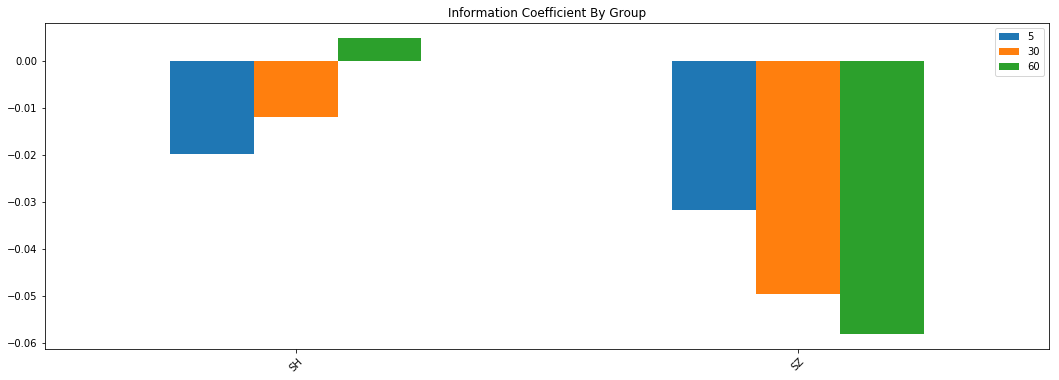

In [28]:
from matplotlib import pyplot as plt
alphalens.plotting.plot_ic_by_group(ic_by_sector)
plt.show()

##### 5.2

Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 57%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 57%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 57%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 57%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 57%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 57%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%


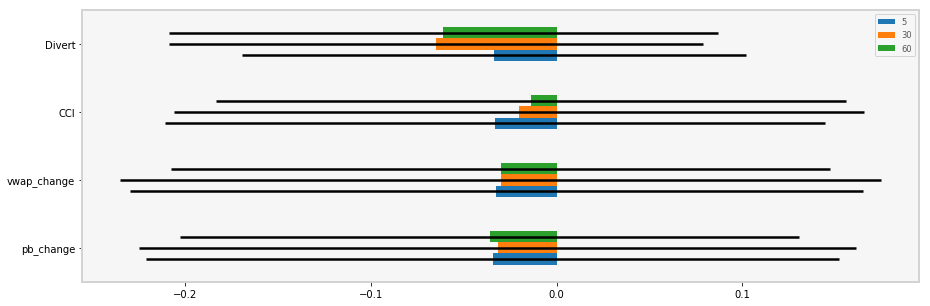

In [9]:
from jaqs_fxdayu.data import signal_function_mod as sfm
import warnings
import numpy as np
warnings.filterwarnings("ignore")
#定义信号过滤条件-非指数成分、创业板
def _mask():
    # 过滤条件1：不属于沪深300成分股
    df_index_member = dv.get_ts('index_member')
    mask_index_member = df_index_member == 0
    return mask_index_member

# 定义可买卖条件——未停牌、未涨跌停
def limit_up_down():
    trade_status = dv.get_ts('trade_status')
    mask_sus = trade_status != 1
    # 涨停
    up_limit = dv.add_formula('up_limit', '(close - Delay(close, 1)) / Delay(close, 1) > 0.095', is_quarterly=False)
    # 跌停
    down_limit = dv.add_formula('down_limit', '(close - Delay(close, 1)) / Delay(close, 1) < -0.095', is_quarterly=False)
    can_enter = np.logical_and(up_limit < 1, ~mask_sus) # 未涨停未停牌
    can_exit = np.logical_and(down_limit < 1, ~mask_sus) # 未跌停未停牌
    return can_enter,can_exit

mask = _mask()
can_enter,can_exit = limit_up_down()

# pb 10日变化率
dv.add_formula("pb_change","Return(pb,10)", is_quarterly=False,add_data=True)
# vwap 10日变化率
dv.add_formula("vwap_change","Return(vwap_adj,10)", is_quarterly=False,add_data=True)
dv.add_formula("Divert", "Correlation(close_adj,volume, 20)", is_quarterly=False, add_data=True)


from jaqs_fxdayu.research.signaldigger import process

Open = dv.get_ts("open_adj")
High = dv.get_ts("high_adj")
Low = dv.get_ts("low_adj")
Close = dv.get_ts("close_adj")
trade_status = dv.get_ts('trade_status')
mask_sus = trade_status == 0
# 剔除掉停牌期的数据　再计算指标
open_masked = process._mask_df(Open,mask=mask_sus)
high_masked = process._mask_df(High,mask=mask_sus)
low_masked = process._mask_df(Low,mask=mask_sus)
close_masked = process._mask_df(Close,mask=mask_sus)
CCI = sfm.ta(ta_method='CCI', ta_column=0, Open=open_masked, High=high_masked, Low=low_masked, Close=close_masked, Volume=None)
dv.append_df(CCI,'CCI')

from jaqs_fxdayu.research.signaldigger import multi_factor

ic = dict()
factors_dict = {signal:dv.get_ts(signal) for signal in ["pb_change","vwap_change","CCI","Divert"]}
for period in [5, 30, 60]:
    ic[period]=multi_factor.get_factors_ic_df(factors_dict,
                                              price=dv.get_ts("close_adj"),
                                              high=dv.get_ts("high_adj"), # 可为空
                                              low=dv.get_ts("low_adj"),# 可为空
                                              n_quantiles=5,# quantile分类数
                                              mask=mask,# 过滤条件
                                              can_enter=can_enter,# 是否能进场
                                              can_exit=can_exit,# 是否能出场
                                              period=period,# 持有期
                                              benchmark_price=dv.data_benchmark, # 基准价格 可不传入，持有期收益（return）计算为绝对收益
                                              commission = 0.0008,
                                              )
    

periods = [5, 30, 60]
signals = ["pb_change","vwap_change","CCI","Divert"]

ic_mean_table = pd.DataFrame(data=np.nan,columns=periods,index=signals)
ic_std_table = pd.DataFrame(data=np.nan,columns=periods,index=signals)
ir_table = pd.DataFrame(data=np.nan,columns=periods,index=signals)
for signal in signals:
    for period in periods:
        ic_mean_table.loc[signal,period]=ic[period][signal].mean()
        ic_std_table.loc[signal,period]=ic[period][signal].std()
        ir_table.loc[signal,period]=ic[period][signal].mean()/ic[period][signal].std()
%matplotlib inline
ic_mean_table.plot(kind="barh",xerr=ic_std_table,figsize=(15,5))

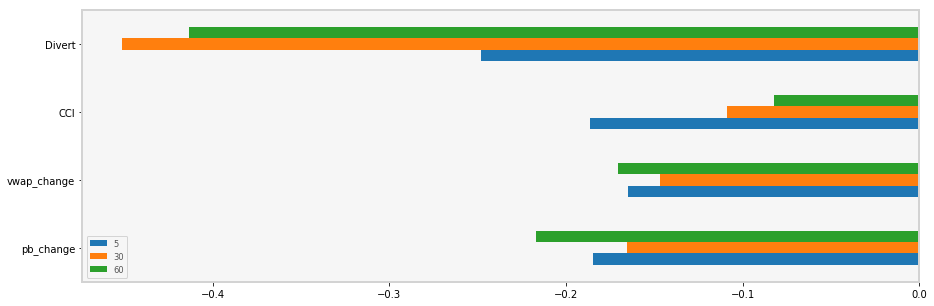

In [32]:
%matplotlib inline
ir_table.plot(kind="barh",figsize=(15,5))

### 比较组合前和组合后的因子在5日持有期下的表现（统一到2014年9月后进行比较）

In [17]:
from jaqs_fxdayu.research.signaldigger import process

factor_dict = dict()
index_member = dv.get_ts('index_member')
for name in ['Divert','CCI','pb_change']:
    signal = -1*dv.get_ts(name) 
    process.winsorize(factor_df=signal,alpha=0.05,index_member=index_member)
    signal = process.standardize(signal,index_member)
    factor_dict[name] = signal
props = {
    'price':dv.get_ts('close_adj'),
    'high':dv.get_ts('high_adj'), 
    'low':dv.get_ts('low_adj'),
    'ret_type': 'return',
    'benchmark_price': dv.data_benchmark,  
    'period': 5, 
    'mask': mask,
    'can_enter': can_enter,
    'can_exit': can_exit,
    'forward': True,
    'commission': 0.0008,
    'covariance_type': 'shrink',  
    'rollback_period': 120} 


In [19]:
comb_factors = dict()
for method in ['equal_weight','ic_weight','ir_weight','max_IR','max_IC']:
    comb_factors[method] = multi_factor.combine_factors(factor_dict,
                                                        standardize_type='z_score',
                                                        winsorization=False,
                                                        weighted_method=method,
                                                        props=props)                      //pandas==0.20.0无法下载 仅有 0.20.3/0.20.1版本
                                                                                                //可下载，依然有reshape问题

Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 57%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%


AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
period = 5
ic_5  =   multi_factor.get_factors_ic_df(comb_factors,
                                          price=dv.get_ts("close_adj"),
                                          high=dv.get_ts("high_adj"), # 可为空
                                          low=dv.get_ts("low_adj"),# 可为空
                                          n_quantiles=5,# quantile分类数
                                          mask=mask,# 过滤条件
                                          can_enter=can_enter,# 是否能进场
                                          can_exit=can_exit,# 是否能出场
                                          period=period,# 持有期
                                          benchmark_price=dv.data_benchmark, # 基准价格 可不传入，持有期收益（return）计算为绝对收益
                                          commission = 0.0008,
                                          )

ic_5 = pd.concat([ic_5,-1*ic[5].drop("vwap_change",axis=1)],axis=1)
ic_5_mean = dict()
ic_5_std = dict()
ir_5 = dict()
for name in ic_5.columns:    
    ic_5_mean[name]=ic_5[name].loc[20140901:].mean()
    ic_5_std[name]=ic_5[name].loc[20140901:].std()
    ir_5[name] = ic_5_mean[name]/ic_5_std[name]
    
import datetime

trade_date = pd.Series(ic_5.index)
trade_date = trade_date.apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'))
ic_5.index = trade_date

pd.Series(ic_5_mean).plot(kind="barh",xerr=pd.Series(ic_5_std),figsize=(15,5))

In [ ]:
print(ic_5_mean["ir_weight"])
print(ic_5_mean["ic_weight"])
print(ic_5_mean["equal_weight"])

In [ ]:
pd.Series(ir_5).plot(kind="barh",figsize=(15,5))

In [ ]:
ic_5[["equal_weight","ic_weight","ir_weight"]].plot(kind="line",figsize=(15,5),)

In [ ]:
ic_5.loc[datetime.date(2017,1,3):,][["equal_weight","ic_weight","ir_weight"]].plot(kind="line",figsize=(15,5),)

In [ ]:
print(ir_5['equal_weight'])
print(ir_5['ic_weight'])
print(ir_5['ir_weight'])

In [ ]:
ic_5[["equal_weight","ic_weight","ir_weight"]].plot(kind="line",figsize=(15,5),)

In [ ]:
ic_5.loc[datetime.date(2017,1,3):,][["equal_weight","ic_weight","ir_weight"]].plot(kind="line",figsize=(15,5),)

##### 5.3

In [15]:
from jaqs_fxdayu.research import Optimizer
price = dv.get_ts('close_adj')
high = dv.get_ts('high_adj')
low = dv.get_ts('low_adj')
price_bench = dv.data_benchmark
optimizer = Optimizer(dataview=dv,
                      formula='- Return(vwap_adj,LEN)',
                      params={"LEN":range(2,11,1)},
                      name='momentum',
                      price=price,
                      high=high,
                      low=low,
                      benchmark_price=None,#=None求绝对收益 #=price_bench求相对收益
                      period=10,
                      n_quantiles=5,
                      mask=mask,
                      can_enter=can_enter,
                      can_exit=can_exit,
                      commission=0.0008,#手续费 默认0.0008
                      is_event=False,#是否是事件(0/1因子)
                      is_quarterly=False)#是否是季度因子 默认为False
ret_best = optimizer.enumerate_optimizer(#target_type="top_quantile_ret",#优化目标类型 
                                         target_type="return_ic",
                                         target="Ann. IR",#优化目标     
                                         in_sample_range=[20140101,20170101],#样本内范围 默认为None,在全样本上优化
                                         ascending=False)#是否按优化目标升序排列(从小到大)
# 样本内最优绩效

print(ret_best[0]["signal_name"])
print(ret_best[0]["ic"])
print(ret_best[0]["ret"])

print(ret_best[0]["space"])

Nan Data Count (should be zero) : 0;  Percentage of effective data: 58%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 57%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 57%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 57%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 57%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 57%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 57%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 57%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 57%
momentum{'LEN': 10}
                return_ic  upside_ret_ic  downside_ret_ic
IC Mean      3.952235e-02      -0.036770     1.021542e-01
IC Std.      1.887009e-01       0.204269     1.879025e-01
t-stat(IC)   5.666624e+00      -4.870188     1.470886e+01
p-value(IC)  2.095541e-08       0.000001     4.321648e-43
IC Skew      2.214152e-01       0.578891  



Value of signals of Different Quantiles Statistics
               min       max      mean       std  count    count %
quantile                                                          
1        -0.808704  0.007599 -0.076528  0.050031  13750  20.129119
2        -0.084603  0.037019 -0.021038  0.018508  13677  20.022252
3        -0.050439  0.063253  0.001917  0.018536  13652  19.985653
4        -0.039393  0.098533  0.022451  0.022301  13677  20.022252
5        -0.020183  1.000000  0.064145  0.076642  13553  19.840724
Figure saved: /Users/zouhao/returns_report.pdf
Information Analysis
                ic
IC Mean     -0.025
IC Std.      0.198
t-stat(IC)  -1.917
p-value(IC)  0.057
IC Skew     -0.108
IC Kurtosis -0.641
Ann. IR     -0.125
Figure saved: /Users/zouhao/information_report.pdf


<Figure size 432x288 with 0 Axes>

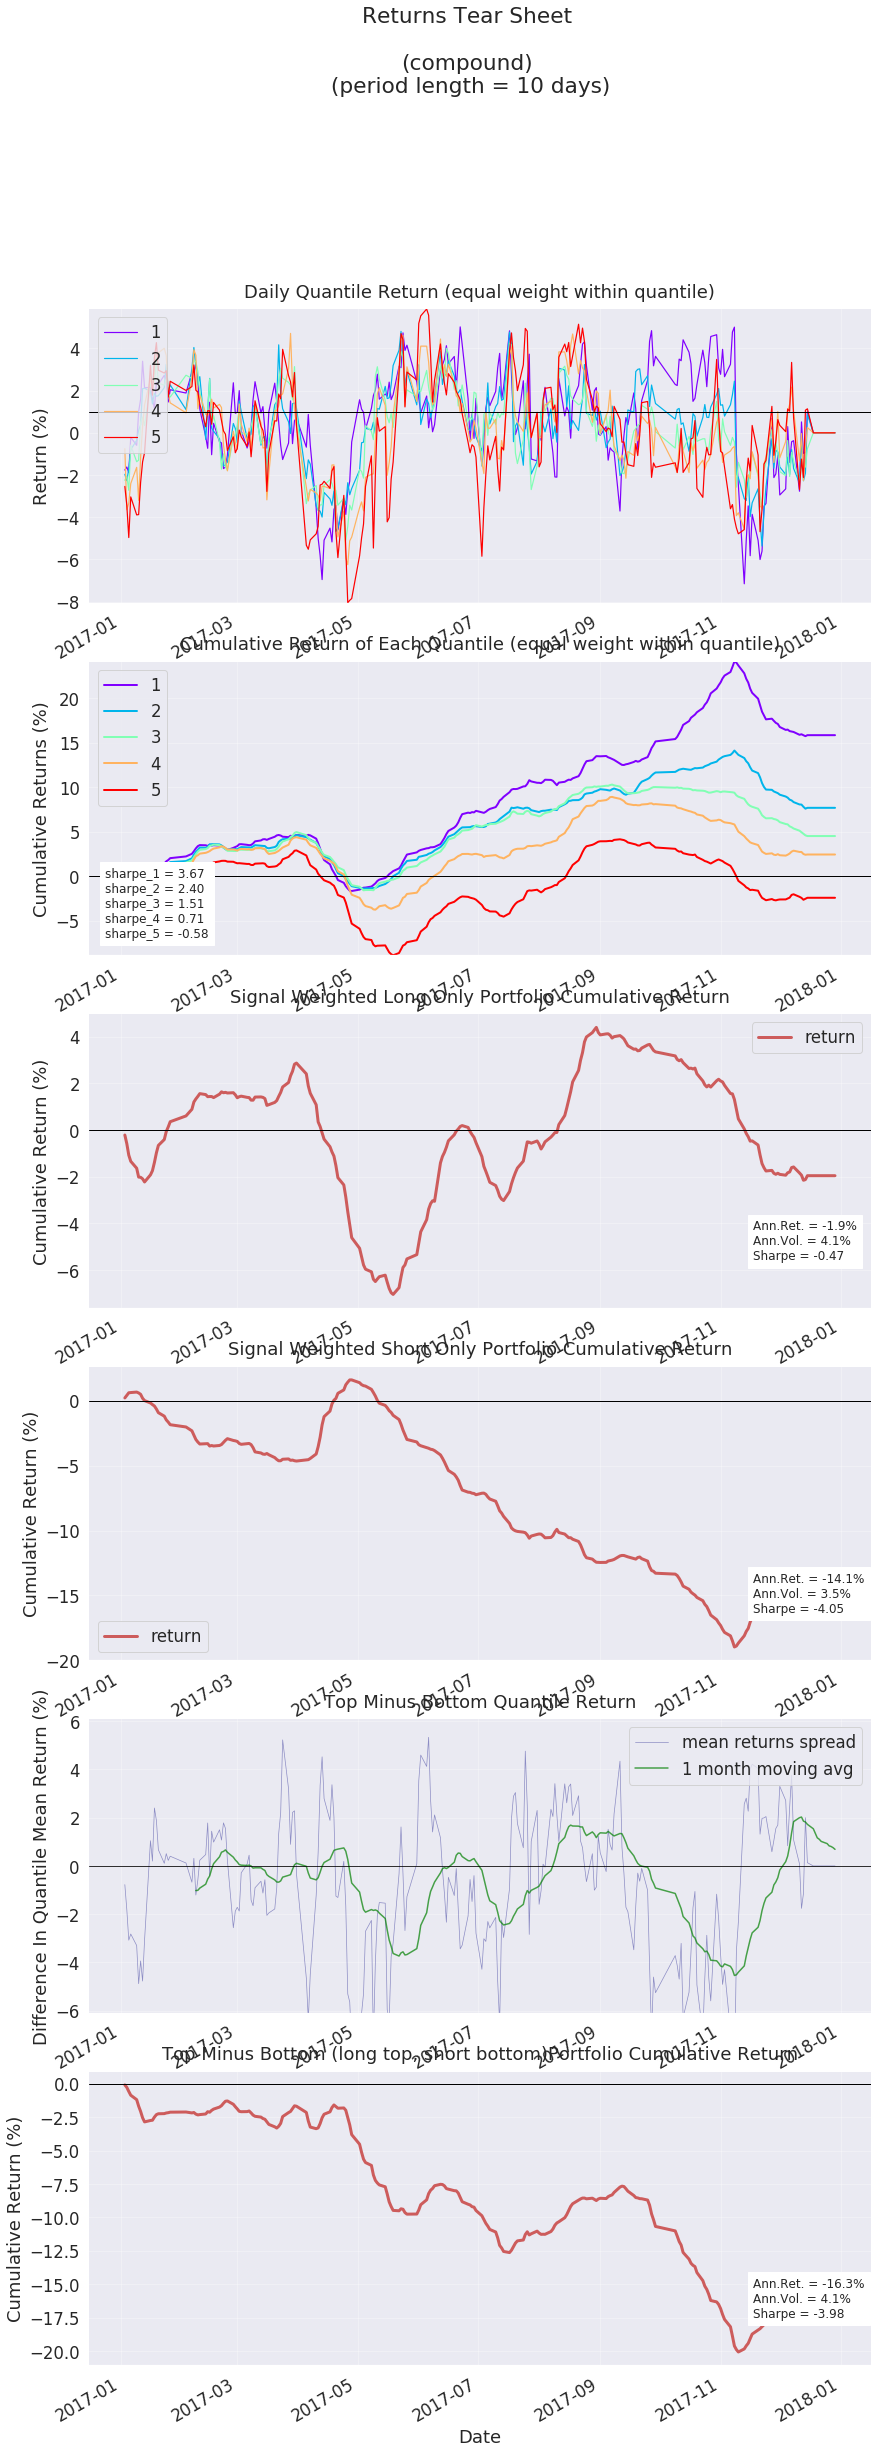

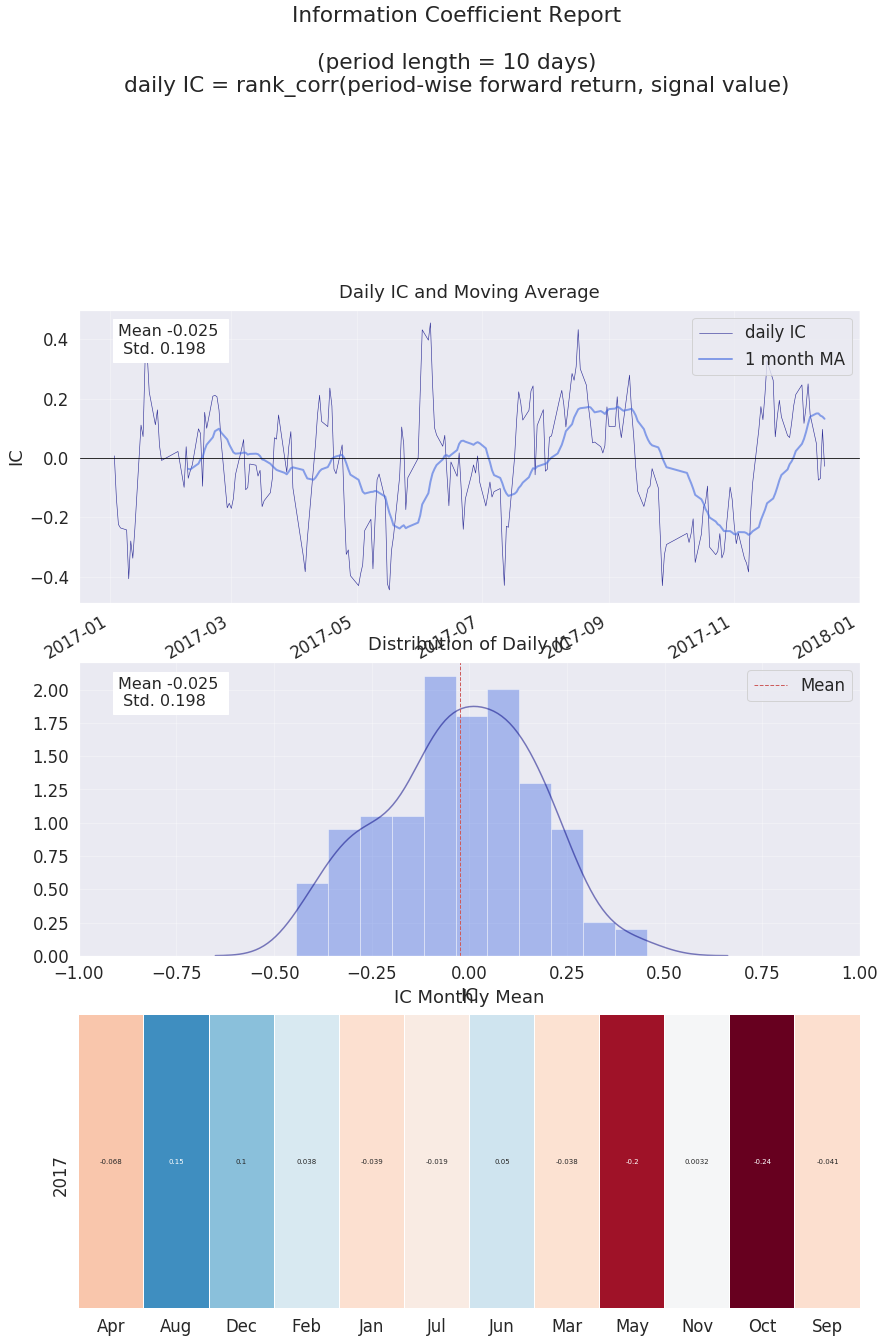

In [16]:
from jaqs_fxdayu.research import SignalDigger
from jaqs_fxdayu.research.signaldigger.analysis import analysis

import matplotlib.pyplot as plt
obj = SignalDigger()

def draw_analysis(signal_data,period):  
    obj.signal_data = signal_data
    obj.period = period
    obj.create_full_report()
    plt.show()
draw_analysis(optimizer.all_signals[ret_best[0]["signal_name"]].loc[20170101:], period=10)